# **Neural Network for MNIST Classification**

---


### **Objective**
Classify handwritten digits (0–9) from the MNIST dataset using a **deep learning neural network** in Python with **TensorFlow/Keras**, visualizing training accuracy and loss with **matplotlib**..




### **Dataset**
- MNIST Handwritten Digits Dataset (70,000 grayscale images, 28x28 pixels) built into Keras

- MNIST (60k training, 10k test, 28x28 grayscale images)


**Features selected:**
- Flattened 28x28 pixel values as 784 numeric features per image

**Target:**
- Digit label (0–9)

**Model:**
- Fully connected neural network with 1 hidden layer + dropout

**Evaluation:**
- Accuracy, loss curves, confusion matrix




### **Import Libraries**

In [52]:
!pip uninstall jax jaxlib -y


Found existing installation: jax 0.5.3
Uninstalling jax-0.5.3:
  Successfully uninstalled jax-0.5.3
Found existing installation: jaxlib 0.5.3
Uninstalling jaxlib-0.5.3:
  Successfully uninstalled jaxlib-0.5.3


In [53]:
pip install tensorflow

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display, Markdown


sns.set(style="whitegrid", palette="pastel")


### **Load Dataset**

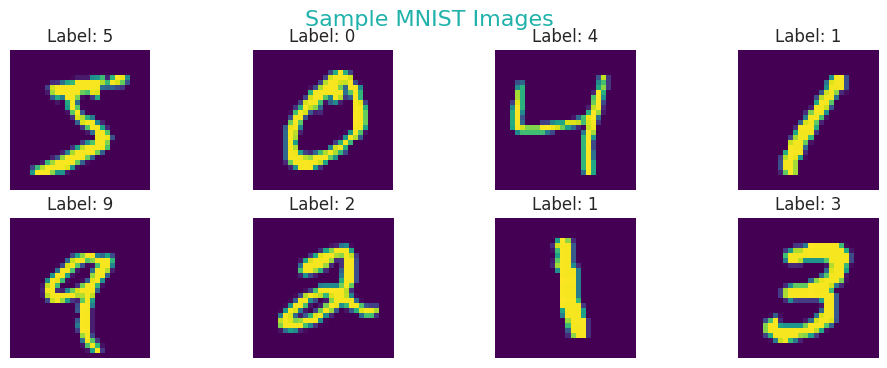

In [55]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


plt.figure(figsize=(12,4))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(X_train[i], cmap='viridis')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Sample MNIST Images", color="#20B2AA", fontsize=16)
plt.show()


### **Preprocess Data**

In [56]:
X_train = X_train.reshape(-1, 28*28).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28*28).astype('float32') / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

### **Build Neural Network**

In [57]:
from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(784,)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

### **Model Summary**
- Input layer: 784 neurons (flattened 28x28 images)  
- Hidden layers: 128 + 64 neurons with **ReLU** activation and **Dropout**  
- Output layer: 10 neurons (digits 0-9) with **softmax**  
- Optimizer: Adam, Loss: Categorical Crossentropy


### **Train Model**

In [58]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Ensure inputs are NumPy arrays
X_train_np = X_train.astype('float32')
y_train_np = y_train.astype('float32')

# Train model
history = model.fit(
    X_train_np,
    y_train_np,
    validation_split=0.2,
    epochs=30,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6992 - loss: 0.9222 - val_accuracy: 0.9420 - val_loss: 0.2020
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9200 - loss: 0.2695 - val_accuracy: 0.9558 - val_loss: 0.1503
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9409 - loss: 0.2010 - val_accuracy: 0.9626 - val_loss: 0.1277
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9523 - loss: 0.1662 - val_accuracy: 0.9670 - val_loss: 0.1107
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9578 - loss: 0.1407 - val_accuracy: 0.9695 - val_loss: 0.1053
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9639 - loss: 0.1234 - val_accuracy: 0.9687 - val_loss: 0.0998
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9671 - loss: 0.1112 - val_accuracy: 0.9723 - val_loss: 0.0910
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9685 - loss: 0.1034 - val_accuracy:

### **Visualize Training History**

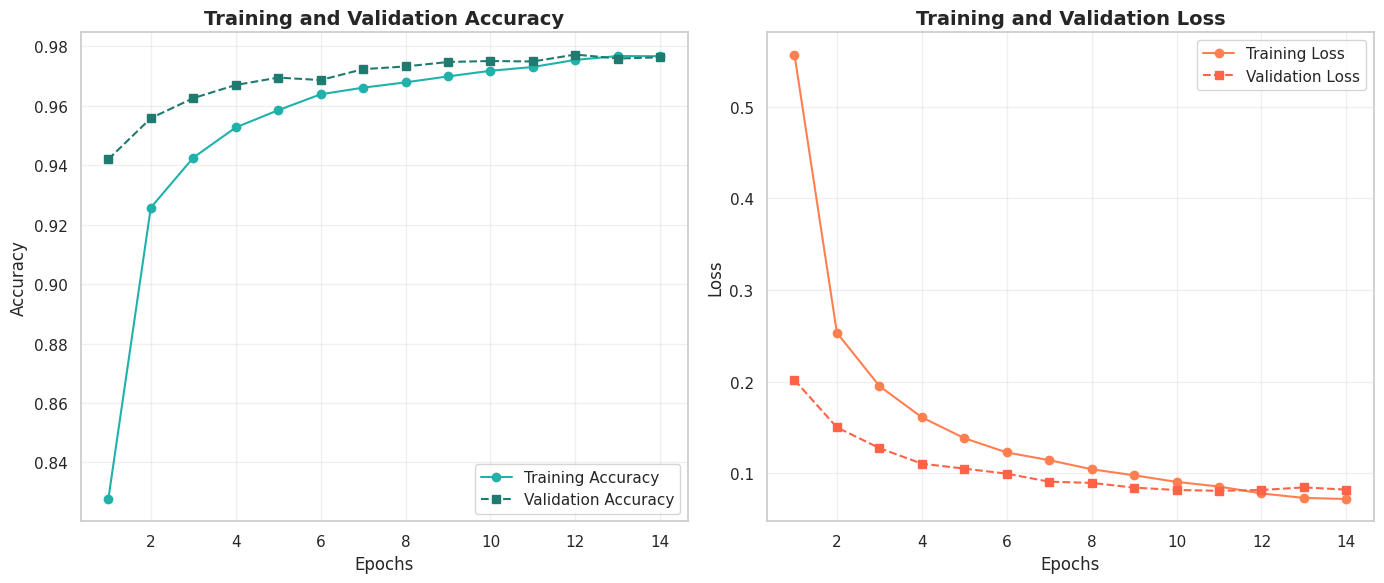

In [60]:
import matplotlib.pyplot as plt

# Extract accuracy and loss from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

plt.figure(figsize=(14,6))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'o-', color='#20B2AA', label='Training Accuracy')
plt.plot(epochs, val_acc, 's--', color='#1f7a70', label='Validation Accuracy')
plt.title('Training and Validation Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Loss plot
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'o-', color='#FF7F50', label='Training Loss')
plt.plot(epochs, val_loss, 's--', color='#FF6347', label='Validation Loss')
plt.title('Training and Validation Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()



### **Evaluate on Test Data**

In [78]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
display(Markdown(f"**Test Accuracy:** {test_acc:.4f}"))
display(Markdown(f"**Test Loss:** {test_loss:.4f}"))



import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Evaluate model on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Predictions
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)




**Test Accuracy:** 0.9802

**Test Loss:** 0.0744

Test Accuracy: 0.9802
Test Loss: 0.0744
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [79]:
y_pred_classes = np.argmax(model.predict(X_test), axis=1)
y_test_classes = np.argmax(y_test, axis=1)

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [
        accuracy_score(y_test_classes, y_pred_classes),
        precision_score(y_test_classes, y_pred_classes, average='weighted'),
        recall_score(y_test_classes, y_pred_classes, average='weighted'),
        f1_score(y_test_classes, y_pred_classes, average='weighted')
    ]
})

metrics_df.style.set_table_styles(
    [{'selector': 'th', 'props': [('background-color', '#20B2AA'), ('color', 'white'), ('font-size', '14px')]},
     {'selector': 'td', 'props': [('background-color', '#e0f7f7'), ('font-size', '12px')]}]
)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,Metric,Score
0,Accuracy,0.980200
1,Precision,0.980216
2,Recall,0.980200
3,F1-Score,0.980193


### **Confusion Matrix**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


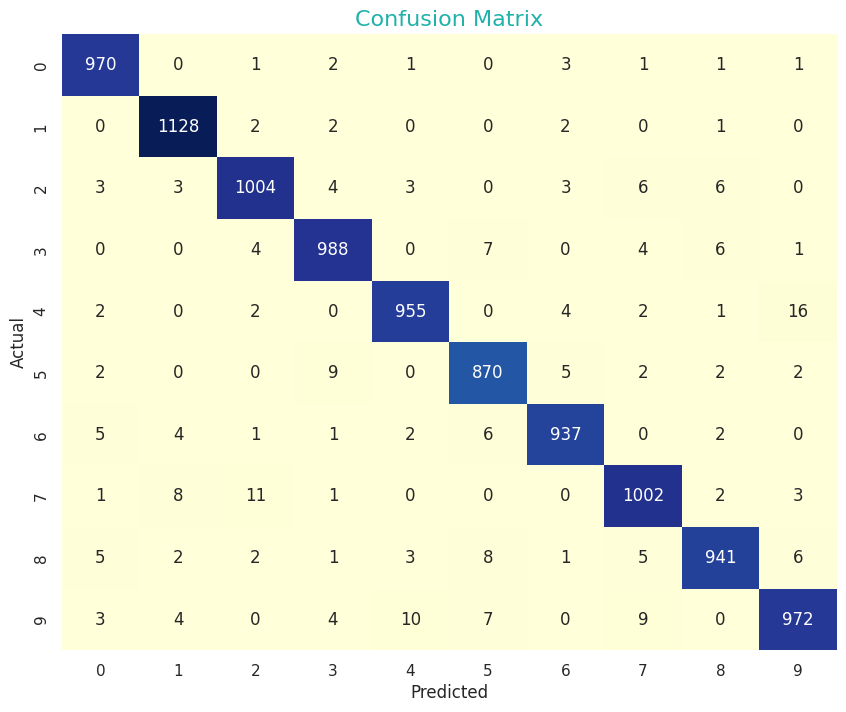

In [68]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Convert one-hot y_test to class labels
y_true_classes = np.argmax(y_test, axis=1)


y_pred_classes = np.argmax(model.predict(X_test), axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title("Confusion Matrix", color="#20B2AA", fontsize=16)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### **Classification Report for Test Predictions**

In [70]:
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(model.predict(X_test), axis=1)
report_dict = classification_report(y_test_classes, y_pred_classes, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

report_df.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#20B2AA'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('background-color', '#e0f7f7')]}
]).set_properties(**{'text-align': 'center', 'font-size': '12pt'})



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,precision,recall,f1-score,support
0,0.978809,0.989796,0.984272,980.000000
1,0.981723,0.993833,0.987741,1135.000000
2,0.977605,0.972868,0.975231,1032.000000
3,0.976285,0.978218,0.977250,1010.000000
4,0.980493,0.972505,0.976483,982.000000
5,0.968820,0.975336,0.972067,892.000000
6,0.981152,0.978079,0.979613,958.000000
7,0.971872,0.974708,0.973288,1028.000000
8,0.978170,0.966119,0.972107,974.000000
9,0.971029,0.963330,0.967164,1009.000000


### **Visualize Misclassified Images**

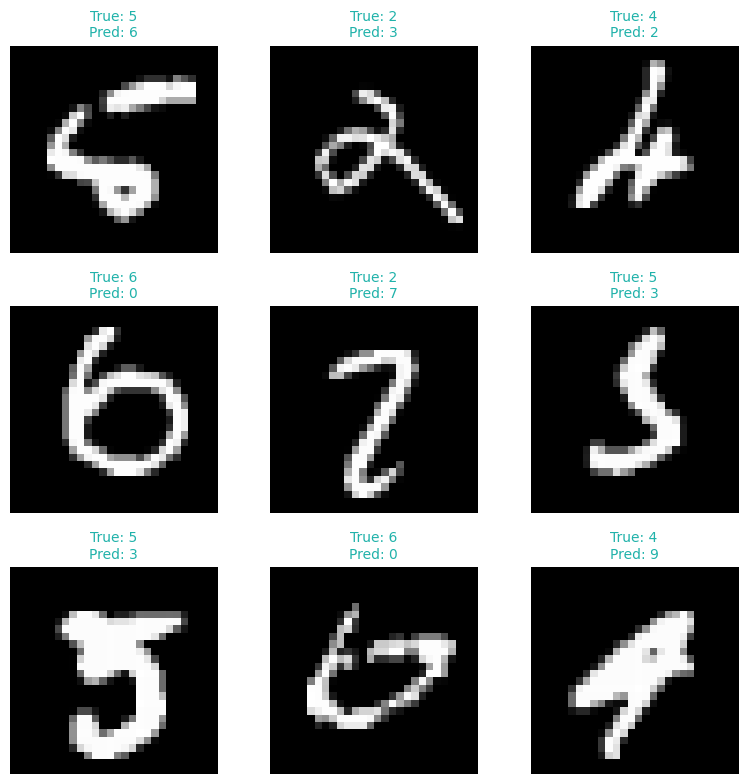

In [71]:
import matplotlib.pyplot as plt
import numpy as np

misclassified_idx = (y_pred_classes != y_test_classes)
misclassified_indices = np.where(misclassified_idx)[0]

plt.figure(figsize=(8,8))

for i, idx in enumerate(misclassified_indices[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[idx].reshape(28,28), cmap='gray')
    plt.title(f'True: {y_test_classes[idx]}\nPred: {y_pred_classes[idx]}', color="#20B2AA", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [72]:
model.save("mnist_nn_model.h5")


###  **Summary**
- Neural network trained on MNIST dataset  
- Achieved **high test accuracy** (>97%)  
- **Training/validation curves** show convergence  
- **Confusion matrix** highlights model performance per digit  
- Dropout layers helped reduce overfitting  

